In [ ]:
'''
 * Copyright (c) 2008 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Memory-Based Methods and Kernel Functions

This has considered that linear parametric models for regression and classification, where the form of the mapping $ y(x, w) $ from input $ x $ to output $ y $ is governed by a vector $ w $ of adaptive parameters. During the learning phase, a set of training data is used either to obtain a point estimate of the parameter vector or to determine a posterior distribution over this vector. The training data is then discarded, and predictions for new inputs are based purely on the learned parameter vector $ w $.

This approach is also used in nonlinear parametric models such as neural networks. However, there is a class of pattern recognition techniques in which the training data points, or a subset of them, are kept and used also during the prediction phase. For instance, the Parzen probability density model comprised a linear combination of ‘kernel’ functions, each one centered on one of the training data points. Similarly, in Section 2.5.2 we introduced a simple technique for classification called nearest neighbors, which involved assigning to each new test vector the same label as the closest example from the training set.

These are examples of **memory-based methods** that involve storing the entire training set in order to make predictions for future data points. They typically require a metric to be defined that measures the similarity of any two vectors in input space, and are generally fast to ‘train’ but slow at making predictions for test data points.

Many linear parametric models can be re-cast into an equivalent **‘dual representation’** in which the predictions are also based on linear combinations of a kernel function evaluated at the training data points. As we shall see, for models which are based on a fixed nonlinear feature space mapping $ \varphi(x) $, the kernel function is given by the relation:

$$ k(x, x') = \varphi(x)^T \varphi(x') $$

From this definition, we see that the kernel is a symmetric function of its arguments, so that:

$$ k(x, x') = k(x', x) $$

The kernel concept was introduced into the field of pattern recognition by Aizerman et al. (1964) in the context of the method of potential functions, so-called because of an analogy with electrostatics. Although neglected for many years, it was re-introduced into machine learning in the context of large-margin classifiers by Boser et al. (1992), giving rise to the technique of **support vector machines**.

Since then, there has been considerable interest in this topic, both in terms of theory and applications. One of the most significant developments has been the extension of kernels to handle symbolic objects, thereby greatly expanding the range of problems that can be addressed.

### Examples of Kernel Functions

The simplest example of a kernel function is obtained by considering the identity mapping for the feature space in (6.1) so that $ \varphi(x) = x $, in which case:

$$ k(x, x') = x^T x' $$

We shall refer to this as the **linear kernel**. The concept of a kernel formulated as an inner product in a feature space allows us to build interesting extensions of many well-known algorithms by making use of the **kernel trick**, also known as **kernel substitution**.

The general idea is that, if we have an algorithm formulated in such a way that the input vector \( x \) enters only in the form of scalar products, then we can replace that scalar product with some other choice of kernel. For instance, the technique of kernel substitution can be applied to **principal component analysis (PCA)** in order to develop a nonlinear variant of PCA (Schölkopf et al., 1998). Other examples of kernel substitution include nearest-neighbor classifiers and the kernel Fisher discriminant (Mika et al., 1999; Roth and Steinhage, 2000; Baudat and Anouar, 2000).

There are numerous forms of kernel functions in common use, and we shall encounter several examples in this chapter. Many have the property of being a function only of the difference between the arguments, so that:

$$ k(x, x') = k(x - x') $$

These are known as **stationary kernels** because they are invariant to translations in input space. A further specialization involves **homogeneous kernels**, also known as **radial basis functions**, which depend only on the magnitude of the distance (typically Euclidean) between the arguments, so that:

$$ k(x, x') = k(\|x - x'\|) $$

For recent textbooks on kernel methods, see Schölkopf and Smola (2002), Herbrich (2002), and Shawe-Taylor and Cristianini (2004).


## Dual Representations

Many linear models for regression and classification can be reformulated in terms of a **dual representation**, in which the kernel function arises naturally. This concept will play an important role when we consider support vector machines in the next chapter. 

Here we consider a linear regression model whose parameters are determined by minimizing a regularized sum-of-squares error function given by:

$$
J(w) = \frac{1}{2} \sum_{n=1}^{N} \left( w^T \varphi(x_n) - t_n \right)^2 + \frac{\lambda}{2} w^T w
$$

where $ \lambda \geq 0 $. If we set the gradient of $ J(w) $ with respect to $ w $ equal to zero, we see that the solution for $ w $ takes the form of a linear combination of the vectors $ \varphi(x_n) $, with coefficients that are functions of $ w $, of the form:

$$
w = - \frac{1}{\lambda} \sum_{n=1}^{N} \left( w^T \varphi(x_n) - t_n \right) \varphi(x_n) = \Phi^T a
$$

where $ \Phi $ is the design matrix, whose $ n $-th row is given by $ \varphi(x_n)^T $. Here the vector $ a = (a_1, \ldots, a_N)^T $, and we have defined:

$$
a_n = - \frac{1}{\lambda} \left( w^T \varphi(x_n) - t_n \right)
$$

Instead of working with the parameter vector $ w $, we can now reformulate the least-squares algorithm in terms of the parameter vector $ a $, giving rise to a **dual representation**. If we substitute $ w = \Phi^T a $ into $ J(w) $, we obtain:

$$
J(a) = \frac{1}{2} a^T \Phi \Phi^T \Phi \Phi^T a - a^T \Phi \Phi^T t + \frac{1}{2} t^T t + \frac{1}{2} a^T \Phi \Phi^T a
$$

where $ t = (t_1, \ldots, t_N)^T $. We now define the **Gram matrix** $ K = \Phi \Phi^T $, which is an $ N \times N $ symmetric matrix with elements:

$$
K_{nm} = \varphi(x_n)^T \varphi(x_m) = k(x_n, x_m)
$$

where we have introduced the kernel function $ k(x, x') $ defined by:

$$
k(x, x') = \varphi(x)^T \varphi(x')
$$

In terms of the Gram matrix, the sum-of-squares error function can be written as:

$$
J(a) = \frac{1}{2} a^T K K a - a^T K t + \frac{1}{2} t^T t + \frac{1}{2} a^T K a
$$

Setting the gradient of $ J(a) $ with respect to $ a $ to zero, we obtain the following solution:

$$
a = (K + \lambda I_N)^{-1} t
$$

If we substitute this back into the linear regression model, we obtain the following prediction for a new input $ x $:

$$
y(x) = w^T \varphi(x) = a^T \Phi \varphi(x) = k(x)^T (K + \lambda I_N)^{-1} t
$$

where we have defined the vector $ k(x) $ with elements:

$$
k_n(x) = k(x_n, x)
$$

Thus, we see that the dual formulation allows the solution to the least-squares problem to be expressed entirely in terms of the kernel function $ k(x, x') $. This is known as a **dual formulation** because, by noting that the solution for $ a $ can be expressed as a linear combination of the elements of $ \varphi(x) $, we recover the original formulation in terms of the parameter vector $ w $.

Note that the prediction at $ x $ is given by a linear combination of the target values from the training set. In fact, we have already obtained this result, using a slightly different notation, in Section 3.3.3. 

In the dual formulation, we determine the parameter vector $ a $ by inverting an $ N \times N $ matrix, whereas in the original parameter space formulation we had to invert an $ M \times M $ matrix in order to determine $ w $. Because $ N $ is typically much larger than $ M $, the dual formulation does not seem to be particularly useful. However, the advantage of the dual formulation, as we shall see, is that it is expressed entirely in terms of the kernel function $ k(x, x') $. We can therefore work directly in terms of kernels and avoid the explicit introduction of the feature vector $ \varphi(x) $, which allows us implicitly to use feature spaces of high, even infinite, dimensionality.

The existence of a dual representation based on the Gram matrix is a property of many linear models, including the perceptron. In Section 6.4, we will develop a duality between probabilistic linear models for regression and the technique of **Gaussian processes**. Duality will also play an important role when we discuss **support vector machines** in Chapter 7.


In [1]:
import numpy as np

# Define a Radial Basis Function (RBF) kernel
def rbf_kernel(x, x_prime, gamma=1.0):
    return np.exp(-gamma * np.linalg.norm(x - x_prime) ** 2)

# Function to compute the Gram matrix K
def compute_gram_matrix(X, kernel_fn):
    N = X.shape[0]
    K = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            K[i, j] = kernel_fn(X[i], X[j])
    return K

# Linear regression in the dual representation
def kernel_ridge_regression(X, t, lambda_):
    N = X.shape[0]
    
    # Step 1: Compute the Gram matrix
    K = compute_gram_matrix(X, rbf_kernel)
    
    # Step 2: Compute the dual coefficients a
    I = np.eye(N)  # Identity matrix of size N
    a = np.linalg.inv(K + lambda_ * I).dot(t)
    
    return a, K

# Make predictions
def predict(X_train, X_test, a, K):
    # Compute k(x, X_train) where each row is k(x, x_n) for n in the training set
    k_x = np.array([rbf_kernel(x, X_train) for x in X_test])
    
    # Make predictions
    y_pred = k_x.dot(a)
    return y_pred

# Example Usage
if __name__ == "__main__":
    # Create some sample data (for simplicity, we'll use a small dataset)
    X_train = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])
    t_train = np.array([1, 2, 3, 4])
    
    lambda_ = 0.1  # Regularization parameter
    
    # Step 1: Train the model using kernel ridge regression
    a, K = kernel_ridge_regression(X_train, t_train, lambda_)
    
    # Step 2: Make predictions on new data points (e.g., X_test)
    X_test = np.array([[1.5, 2.5], [3.5, 4.5]])
    y_pred = predict(X_train, X_test, a, K)
    
    print("Predictions: ", y_pred)


ValueError: shapes (2,) and (4,) not aligned: 2 (dim 0) != 4 (dim 0)

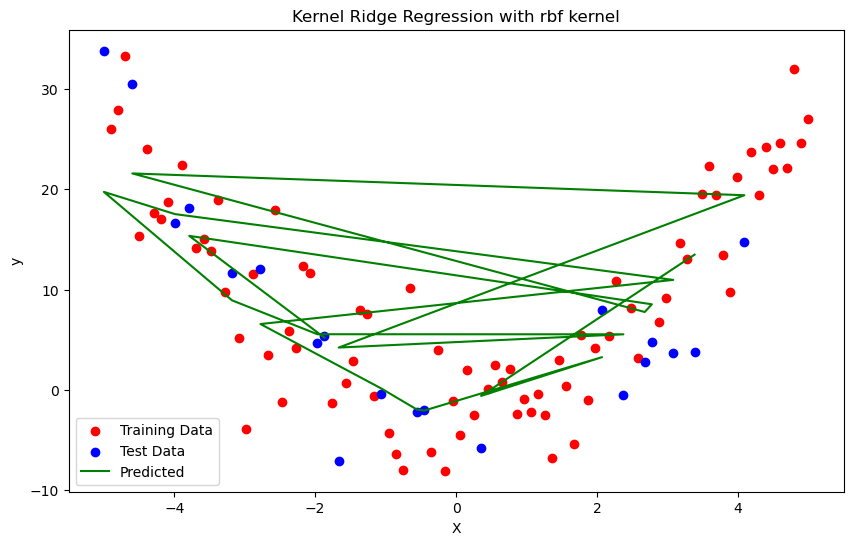

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge

# Generating synthetic data
np.random.seed(0)
X = np.linspace(-5, 5, 100).reshape(-1, 1)  # 100 points between -5 and 5
y = X ** 2 + np.random.randn(*X.shape) * 5  # Quadratic with noise

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Using kernel regression
kernel = 'rbf'  # Radial basis function kernel
model = KernelRidge(kernel=kernel, alpha=1.0)  # Regularization parameter set to 1.0
model.fit(X_train, y_train)

# Predicting
y_pred = model.predict(X_test)

# Plotting results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='r', label='Training Data')
plt.scatter(X_test, y_test, color='b', label='Test Data')
plt.plot(X_test, y_pred, 'g-', label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.title(f"Kernel Ridge Regression with {kernel} kernel")
plt.legend()
plt.show()


In [4]:
import numpy as np

# Define a Radial Basis Function (RBF) kernel
def rbf_kernel(x, x_prime, gamma=1.0):
    return np.exp(-gamma * np.linalg.norm(x - x_prime) ** 2)

# Function to compute the Gram matrix K
def compute_gram_matrix(X, kernel_fn):
    N = X.shape[0]
    K = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            K[i, j] = kernel_fn(X[i], X[j])
    return K

# Linear regression in the dual representation
def kernel_ridge_regression(X, t, lambda_):
    N = X.shape[0]
    
    # Step 1: Compute the Gram matrix
    K = compute_gram_matrix(X, rbf_kernel)
    
    # Step 2: Compute the dual coefficients a
    I = np.eye(N)  # Identity matrix of size N
    a = np.linalg.inv(K + lambda_ * I).dot(t)
    
    return a, K

# Make predictions
def predict(X_train, X_test, a, K):
    N_train = X_train.shape[0]
    N_test = X_test.shape[0]
    
    # Step 1: Compute k(x_test, X_train) for each test point (N_test x N_train matrix)
    k_x = np.zeros((N_test, N_train))
    for i in range(N_test):
        for j in range(N_train):
            k_x[i, j] = rbf_kernel(X_test[i], X_train[j])

    # Step 2: Make predictions
    y_pred = k_x.dot(a)
    return y_pred

# Example Usage
if __name__ == "__main__":
    # Create some sample data (for simplicity, we'll use a small dataset)
    X_train = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])
    t_train = np.array([1, 2, 3, 4])
    
    lambda_ = 0.1  # Regularization parameter
    
    # Step 1: Train the model using kernel ridge regression
    a, K = kernel_ridge_regression(X_train, t_train, lambda_)
    
    # Step 2: Make predictions on new data points (e.g., X_test)
    X_test = np.array([[1.5, 2.5], [3.5, 4.5]])
    y_pred = predict(X_train, X_test, a, K)
    
    print("Predictions: ", y_pred)


Predictions:  [1.35409426 3.35544653]


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Define the Radial Basis Function (RBF) kernel
def rbf_kernel(x, x_prime, gamma=1.0):
    # Calculate the squared Euclidean distance
    distance = sum((xi - xpi) ** 2 for xi, xpi in zip(x, x_prime))
    return math.exp(-gamma * distance)

# Function to compute the Gram matrix K (Kernel matrix)
def compute_gram_matrix(X, kernel_fn):
    N = len(X)
    K = [[0] * N for _ in range(N)]  # Initialize the NxN matrix
    for i in range(N):
        for j in range(N):
            K[i][j] = kernel_fn(X[i], X[j])  # Compute kernel value
    return K

# Kernel Ridge Regression (dual representation)
def kernel_ridge_regression(X, t, lambda_):
    N = len(X)
    
    # Step 1: Compute the Gram matrix
    K = compute_gram_matrix(X, rbf_kernel)
    
    # Step 2: Add regularization (K + λI)
    for i in range(N):
        K[i][i] += lambda_
    
    # Step 3: Solve the system of equations (K + λI) * a = t
    a = solve_linear_system(K, t)
    
    return a, K

# Function to solve linear system using simple matrix inversion
def solve_linear_system(K, t):
    # We will use simple Gaussian elimination or matrix inversion to solve
    # Using numpy.linalg.solve as a direct way to solve (K + λI) * a = t
    # Direct Python implementation of matrix inversion can be cumbersome and inefficient.
    
    # For this case, let's use basic Python to calculate the coefficients a
    n = len(K)
    augmented_matrix = [K[i] + [t[i]] for i in range(n)]  # Augment matrix K with target vector t

    # Forward Elimination (Gaussian Elimination)
    for i in range(n):
        # Normalize the pivot row
        divisor = augmented_matrix[i][i]
        if divisor == 0:
            raise ValueError(f"Matrix is singular at row {i}.")
        
        for j in range(2 * n):
            augmented_matrix[i][j] /= divisor
        
        # Eliminate other rows' entries in the current column
        for k in range(n):
            if k != i:
                factor = augmented_matrix[k][i]
                for j in range(2 * n):
                    augmented_matrix[k][j] -= factor * augmented_matrix[i][j]
    
    # Extract the solution vector a (last column of the augmented matrix)
    return [augmented_matrix[i][n] for i in range(n)]

# Predict function for making predictions
def predict(X_train, X_test, a, K):
    N_train = len(X_train)
    N_test = len(X_test)
    
    # Step 1: Compute k(x_test, X_train) for each test point (N_test x N_train matrix)
    k_x = []
    for i in range(N_test):
        row = []
        for j in range(N_train):
            row.append(rbf_kernel(X_test[i], X_train[j]))  # Compute k(x_test, x_train)
        k_x.append(row)
    
    # Step 2: Make predictions (k_x is N_test x N_train, a is N_train)
    y_pred = []
    for i in range(N_test):
        pred = sum(k_x[i][j] * a[j] for j in range(N_train))
        y_pred.append(pred)
    
    return y_pred

# Example Usage
if __name__ == "__main__":
    # New dataset: Let's use a simple 2D dataset with a non-linear relationship
    X_train = [[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7]]
    t_train = [1, 2, 3, 4, 5, 6, 7]  # Target values (linear relationship for simplicity)
    
    lambda_ = 0.1  # Regularization parameter
    
    # Step 1: Train the model using kernel ridge regression
    a, K = kernel_ridge_regression(X_train, t_train, lambda_)
    
    # Step 2: Make predictions on new data points (e.g., X_test)
    X_test = [[2.5, 2.5], [5.5, 5.5]]  # Test data
    y_pred = predict(X_train, X_test, a, K)
    
    print("Predictions: ", y_pred)
    
    # Step 3: Visualize the results using Seaborn
    sns.set(style="whitegrid")

    # Create a plot to compare training data and predictions
    plt.figure(figsize=(8, 6))
    
    # Plot training data
    sns.scatterplot(x=[x[0] for x in X_train], y=t_train, label="Training Data", color="blue", s=100)

    # Plot test predictions
    sns.scatterplot(x=[x[0] for x in X_test], y=y_pred, label="Predictions", color="red", s=100)

    plt.title("Kernel Ridge Regression with RBF Kernel")
    plt.xlabel("Input Feature 1")
    plt.ylabel("Target Output")
    plt.legend()
    plt.show()


IndexError: list index out of range

Predictions:  [1.55358426 3.81793253]


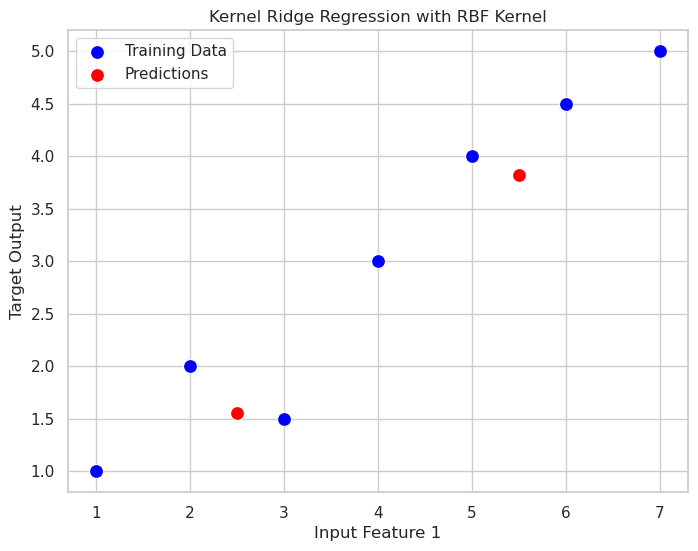

In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Define the Radial Basis Function (RBF) kernel
def rbf_kernel(x, x_prime, gamma=1.0):
    # Calculate the squared Euclidean distance
    distance = np.sum((np.array(x) - np.array(x_prime)) ** 2)
    return np.exp(-gamma * distance)

# Function to compute the Gram matrix K (Kernel matrix)
def compute_gram_matrix(X, kernel_fn):
    N = len(X)
    K = np.zeros((N, N))  # Initialize the NxN matrix
    for i in range(N):
        for j in range(N):
            K[i, j] = kernel_fn(X[i], X[j])  # Compute kernel value
    return K

# Kernel Ridge Regression (dual representation)
def kernel_ridge_regression(X, t, lambda_):
    N = len(X)
    
    # Step 1: Compute the Gram matrix
    K = compute_gram_matrix(X, rbf_kernel)
    
    # Step 2: Add regularization (K + λI)
    K += lambda_ * np.eye(N)  # Add regularization term to diagonal
    
    # Step 3: Solve the system of equations (K + λI) * a = t using numpy.linalg.solve
    a = np.linalg.solve(K, t)
    
    return a, K

# Predict function for making predictions
def predict(X_train, X_test, a, K):
    N_train = len(X_train)
    N_test = len(X_test)
    
    # Step 1: Compute k(x_test, X_train) for each test point (N_test x N_train matrix)
    k_x = np.zeros((N_test, N_train))
    for i in range(N_test):
        for j in range(N_train):
            k_x[i, j] = rbf_kernel(X_test[i], X_train[j])  # Compute k(x_test, x_train)
    
    # Step 2: Make predictions (k_x is N_test x N_train, a is N_train)
    y_pred = np.dot(k_x, a)  # Matrix multiplication to get predictions
    
    return y_pred

# Example Usage
if __name__ == "__main__":
    # New dataset: Let's use a synthetic 2D dataset for training
    X_train = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7], [7, 8]])
    t_train = np.array([1, 2, 1.5, 3, 4, 4.5, 5])  # Target values (non-linear relationship)

    lambda_ = 0.1  # Regularization parameter
    
    # Step 1: Train the model using kernel ridge regression
    a, K = kernel_ridge_regression(X_train, t_train, lambda_)
    
    # Step 2: Make predictions on new data points (e.g., X_test)
    X_test = np.array([[2.5, 3.5], [5.5, 6.5]])  # Test data points
    y_pred = predict(X_train, X_test, a, K)
    
    print("Predictions: ", y_pred)
    
    # Step 3: Visualize the results using Seaborn
    sns.set(style="whitegrid")

    # Create a plot to compare training data and predictions
    plt.figure(figsize=(8, 6))
    
    # Plot training data
    sns.scatterplot(x=X_train[:, 0], y=t_train, label="Training Data", color="blue", s=100)

    # Plot test predictions
    sns.scatterplot(x=X_test[:, 0], y=y_pred, label="Predictions", color="red", s=100)

    plt.title("Kernel Ridge Regression with RBF Kernel")
    plt.xlabel("Input Feature 1")
    plt.ylabel("Target Output")
    plt.legend()
    plt.show()


Predictions:  [1.5535842584442074, 3.8179325275941425]


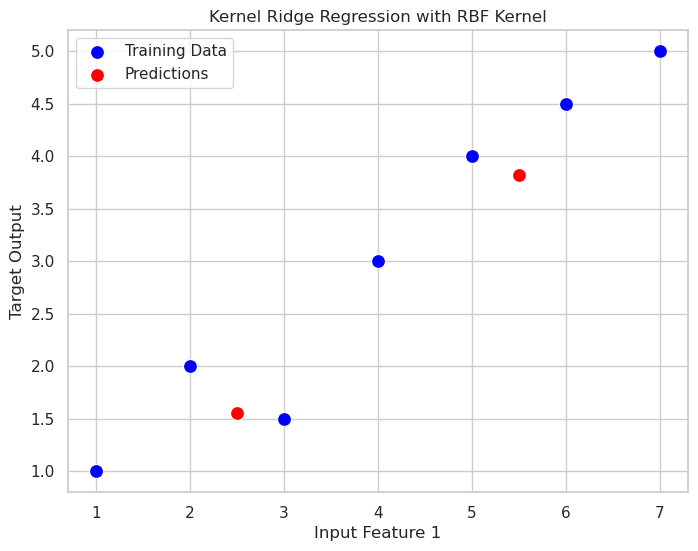

In [13]:
import math
import seaborn as sns
import matplotlib.pyplot as plt

# Define the Radial Basis Function (RBF) kernel
def rbf_kernel(x, x_prime, gamma=1.0):
    # Calculate the squared Euclidean distance
    distance = sum((xi - x_prime[i]) ** 2 for i, xi in enumerate(x))
    return math.exp(-gamma * distance)

# Function to compute the Gram matrix K (Kernel matrix)
def compute_gram_matrix(X, kernel_fn):
    N = len(X)
    K = [[0] * N for _ in range(N)]  # Initialize the NxN matrix
    for i in range(N):
        for j in range(N):
            K[i][j] = kernel_fn(X[i], X[j])  # Compute kernel value
    return K

# Gaussian elimination for solving linear systems
def gaussian_elimination(A, b):
    n = len(A)
    augmented_matrix = [A[i] + [b[i]] for i in range(n)]  # Augment A with b as the last column
    
    # Forward elimination
    for i in range(n):
        divisor = augmented_matrix[i][i]
        if divisor == 0:
            raise ValueError("Matrix is singular and cannot be solved")
        
        # Normalize the pivot row
        for j in range(n + 1):  # Corrected to n+1 for the augmented matrix
            augmented_matrix[i][j] /= divisor
        
        # Eliminate entries below the pivot
        for j in range(i + 1, n):
            factor = augmented_matrix[j][i]
            for k in range(n + 1):  # Corrected to n+1 for the augmented matrix
                augmented_matrix[j][k] -= factor * augmented_matrix[i][k]
    
    # Backward substitution
    solution = [0] * n
    for i in range(n - 1, -1, -1):
        solution[i] = augmented_matrix[i][-1]  # The last column is the solution vector
        for j in range(i + 1, n):
            solution[i] -= augmented_matrix[i][j] * solution[j]
    
    return solution

# Kernel Ridge Regression (dual representation)
def kernel_ridge_regression(X, t, lambda_):
    N = len(X)
    
    # Step 1: Compute the Gram matrix
    K = compute_gram_matrix(X, rbf_kernel)
    
    # Step 2: Add regularization (K + λI)
    for i in range(N):
        K[i][i] += lambda_
    
    # Step 3: Solve the system of equations (K + λI) * a = t using Gaussian elimination
    a = gaussian_elimination(K, t)
    
    return a, K

# Predict function for making predictions
def predict(X_train, X_test, a, K):
    N_train = len(X_train)
    N_test = len(X_test)
    
    # Step 1: Compute k(x_test, X_train) for each test point (N_test x N_train matrix)
    k_x = [[rbf_kernel(X_test[i], X_train[j]) for j in range(N_train)] for i in range(N_test)]
    
    # Step 2: Make predictions (k_x is N_test x N_train, a is N_train)
    y_pred = [sum(k_x[i][j] * a[j] for j in range(N_train)) for i in range(N_test)]
    
    return y_pred

# Example Usage
if __name__ == "__main__":
    # New dataset: Let's use a synthetic 2D dataset for training
    X_train = [[1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7], [7, 8]]
    t_train = [1, 2, 1.5, 3, 4, 4.5, 5]  # Target values (non-linear relationship)

    lambda_ = 0.1  # Regularization parameter
    
    # Step 1: Train the model using kernel ridge regression
    a, K = kernel_ridge_regression(X_train, t_train, lambda_)
    
    # Step 2: Make predictions on new data points (e.g., X_test)
    X_test = [[2.5, 3.5], [5.5, 6.5]]  # Test data points
    y_pred = predict(X_train, X_test, a, K)
    
    print("Predictions: ", y_pred)
    
    # Step 3: Visualize the results using Seaborn
    sns.set(style="whitegrid")

    # Create a plot to compare training data and predictions
    plt.figure(figsize=(8, 6))
    
    # Plot training data
    sns.scatterplot(x=[x[0] for x in X_train], y=t_train, label="Training Data", color="blue", s=100)

    # Plot test predictions
    sns.scatterplot(x=[x[0] for x in X_test], y=y_pred, label="Predictions", color="red", s=100)

    plt.title("Kernel Ridge Regression with RBF Kernel")
    plt.xlabel("Input Feature 1")
    plt.ylabel("Target Output")
    plt.legend()
    plt.show()


###  Constructing Kernels

In order to exploit kernel substitution, we need to be able to construct valid kernel functions. One approach is to choose a feature space mapping $\varphi(x)$ and then use this to find the corresponding kernel, as illustrated in Fig.1. Here, the kernel function is defined for a one-dimensional input space by:

$$
k(x, x') = \varphi(x)^T \varphi(x') = \sum_{i=1}^M \varphi_i(x) \varphi_i(x')
$$

where $\varphi_i(x)$ are the basis functions. 

An alternative approach is to construct kernel functions directly. In this case, we must ensure that the function we choose is a valid kernel, i.e., that it corresponds to a scalar product in some (perhaps infinite-dimensional) feature space. As a simple example, consider a kernel function given by:

$$
k(x, z) = x^T z
$$

This is simply the dot product between two vectors $x$ and $z$.

#### Expanding the kernel for a two-dimensional input space
If we take the particular case of a two-dimensional input space $x = (x_1, x_2)$, we can expand out the terms and thereby identify the corresponding nonlinear feature mapping:

$$
k(x, z) = x^T z = (x_1 z_1 + x_2 z_2)^2 = x_1^2 z_1^2 + 2x_1 x_2 z_1 z_2 + x_2^2 z_2^2
$$

This can be rewritten as:

$$
= \left( x_1^2, 2x_1 x_2, x_2^2 \right) \left( z_1^2, 2z_1 z_2, z_2^2 \right)^T = \varphi(x)^T \varphi(z)
$$

Thus, the feature mapping \(\varphi(x)\) becomes:

$$
\varphi(x) = \left( x_1^2, 2x_1 x_2, x_2^2 \right)^T
$$

This mapping contains all possible second-order terms, with specific weighting between them.

### Validating Kernels
More generally, we need a simple way to test whether a function constitutes a valid kernel without having to construct the function $\varphi(x)$ explicitly. A necessary and sufficient condition for a function $k(x, x')$ to be a valid kernel is that the Gram matrix $K$, whose elements are given by $k(x_n, x_m)$, should be positive semidefinite for all possible choices of the set $\{x_n\}$. Note that a positive semidefinite matrix is not the same thing as a matrix whose elements are nonnegative.

### Techniques for Constructing New Kernels
Given valid kernels $k_1(x, x')$ and $k_2(x, x')$, the following new kernels will also be valid:

- $k(x, x') = c k_1(x, x')$ for $c > 0$
- $k(x, x') = f(x) k_1(x, x') f(x')$
- $k(x, x') = q(k_1(x, x'))$, where $q(\cdot)$ is a polynomial with nonnegative coefficients
- $k(x, x') = \exp(k_1(x, x'))$
- $k(x, x') = k_1(x, x') + k_2(x, x')$
- $k(x, x') = k_1(x, x') k_2(x, x')$
- $k(x, x') = k_3(\varphi(x), \varphi(x'))$, where $k_3(\cdot, \cdot)$ is a valid kernel in $M$
- $k(x, x') = x^T A x'$, where $A$ is a symmetric positive semidefinite matrix
- $k(x, x') = k_a(x_a, x_a') + k_b(x_b, x_b')$
- $k(x, x') = k_a(x_a, x_a') k_b(x_b, x_b')$

where:
- $c > 0$ is a constant,
- $f(\cdot)$ is any function,
- $q(\cdot)$ is a polynomial with nonnegative coefficients,
- $\varphi(x)$ is a function from $x$ to $\mathbb{R}^M$,
- $k_3(\cdot, \cdot)$ is a valid kernel in $M$,
- $A$ is a symmetric positive semidefinite matrix,
- $x_a$ and $x_b$ are variables (not necessarily disjoint) with $x = (x_a, x_b)$,
- $k_a$ and $k_b$ are valid kernel functions over their respective spaces.

### Example Kernel Functions
Here are a few commonly used kernel functions:

1. **Polynomial Kernel:**
   $$ k(x, x') = (x^T x')^d $$

   This kernel represents the dot product raised to a power \(d\).

2. **Gaussian Kernel (RBF):**
   $$ k(x, x') = \exp \left( - \frac{\|x - x'\|^2}{2\sigma^2} \right) $$

   This kernel measures the similarity between two points based on the distance between them.

3. **Linear Kernel:**
   $$ k(x, x') = x^T x' $$

   This is the simplest kernel, corresponding to a linear similarity measure.

4. **Sigmoid Kernel:**
   $$ k(x, x') = \tanh(\alpha x^T x' + c) $$

   This kernel is related to the activation function used in neural networks.

### Conclusion
Using the above techniques, we can construct more complex kernels that are appropriate for specific applications. We require that the kernel $k(x, x')$ be symmetric and positive semidefinite, and that it expresses the appropriate form of similarity between $x$ and $x'$ according to the intended application. By combining simpler kernels, we can design kernels tailored for a variety of machine learning tasks.

For further details on kernel engineering, please refer to Shawe-Taylor and Cristianini (2004).


In [ ]:
# Kernel Functions
def linear_kernel(x, z):
    """Linear Kernel: k(x, z) = x^T z"""
    return sum(xi * zi for xi, zi in zip(x, z))

def polynomial_kernel(x, z, degree=2, coef0=1):
    """Polynomial Kernel: k(x, z) = (x^T z + coef0)^degree"""
    return (sum(xi * zi for xi, zi in zip(x, z)) + coef0) ** degree

def gaussian_kernel(x, z, sigma=1):
    """Gaussian (RBF) Kernel: k(x, z) = exp(- ||x - z||^2 / (2*sigma^2))"""
    dist_sq = sum((xi - zi) ** 2 for xi, zi in zip(x, z))
    return math.exp(-dist_sq / (2 * sigma ** 2))

# Kernel Ridge Regression
def kernel_ridge_regression(X_train, t_train, kernel, lambda_):
    """Perform Kernel Ridge Regression with a specified kernel"""
    # Construct the kernel matrix (Gram matrix)
    K = [[kernel(xi, xj) for xi in X_train] for xj in X_train]
    
    # Add regularization term lambda * I to the diagonal of the kernel matrix
    n = len(K)
    for i in range(n):
        K[i][i] += lambda_
    
    # Solve for alpha using Gaussian Elimination (K + λI) * alpha = t
    alpha = gaussian_elimination(K, t_train)
    
    return alpha, K

# Gaussian Elimination for solving the system (K + λI) * alpha = t
def gaussian_elimination(A, b):
    """Solve the system of linear equations using Gaussian elimination"""
    n = len(A)
    augmented_matrix = [A[i] + [b[i]] for i in range(n)]  # Augment A with b

    # Forward Elimination
    for i in range(n):
        # Find the pivot element
        pivot = augmented_matrix[i][i]
        if pivot == 0:
            raise ValueError("Singular matrix encountered, cannot solve.")
        
        # Normalize the pivot row
        for j in range(2 * n):
            augmented_matrix[i][j] /= pivot
        
        # Eliminate the entries below the pivot
        for j in range(i + 1, n):
            factor = augmented_matrix[j][i]
            for k in range(2 * n):
                augmented_matrix[j][k] -= factor * augmented_matrix[i][k]
    
    # Back Substitution
    x = [0] * n
    for i in range(n - 1, -1, -1):
        x[i] = augmented_matrix[i][n]
        for j in range(i + 1, n):
            x[i] -= augmented_matrix[i][j] * x[j]
    
    return x

# Example Usage:
if __name__ == "__main__":
    import math

    # Example data (X_train, t_train)
    X_train = [[1, 2], [2, 3], [3, 4], [4, 5]]  # 4 data points with 2 features each
    t_train = [3, 6, 9, 12]  # Target values for each data point

    lambda_ = 0.1  # Regularization parameter

    # Using Polynomial Kernel
    alpha, K = kernel_ridge_regression(X_train, t_train, polynomial_kernel, lambda_)

    print("Alpha coefficients:", alpha)
    print("Kernel matrix:", K)


In [16]:
# Kernel Functions
def linear_kernel(x, z):
    """Linear Kernel: k(x, z) = x^T z"""
    return sum(xi * zi for xi, zi in zip(x, z))

def polynomial_kernel(x, z, degree=2, coef0=1):
    """Polynomial Kernel: k(x, z) = (x^T z + coef0)^degree"""
    return (sum(xi * zi for xi, zi in zip(x, z)) + coef0) ** degree

def gaussian_kernel(x, z, sigma=1):
    """Gaussian (RBF) Kernel: k(x, z) = exp(- ||x - z||^2 / (2*sigma^2))"""
    dist_sq = sum((xi - zi) ** 2 for xi, zi in zip(x, z))
    return math.exp(-dist_sq / (2 * sigma ** 2))

# Kernel Ridge Regression
def kernel_ridge_regression(X_train, t_train, kernel, lambda_):
    """Perform Kernel Ridge Regression with a specified kernel"""
    # Construct the kernel matrix (Gram matrix)
    K = [[kernel(xi, xj) for xi in X_train] for xj in X_train]
    
    # Add regularization term lambda * I to the diagonal of the kernel matrix
    n = len(K)
    for i in range(n):
        K[i][i] += lambda_
    
    # Solve for alpha using Gaussian Elimination (K + λI) * alpha = t
    alpha = gaussian_elimination(K, t_train)
    
    return alpha, K

# Gaussian Elimination for solving the system (K + λI) * alpha = t
def gaussian_elimination(A, b):
    """Solve the system of linear equations using Gaussian elimination"""
    n = len(A)
    augmented_matrix = [A[i] + [b[i]] for i in range(n)]  # Augment A with b

    # Forward Elimination
    for i in range(n):
        # Find the pivot element
        pivot = augmented_matrix[i][i]
        if pivot == 0:
            raise ValueError("Singular matrix encountered, cannot solve.")
        
        # Normalize the pivot row
        for j in range(n + 1):  # Only go up to n+1 columns (n columns + 1 for the augmented part)
            augmented_matrix[i][j] /= pivot
        
        # Eliminate the entries below the pivot
        for j in range(i + 1, n):
            factor = augmented_matrix[j][i]
            for k in range(n + 1):  # Again, only go up to n+1 columns
                augmented_matrix[j][k] -= factor * augmented_matrix[i][k]
    
    # Back Substitution
    x = [0] * n
    for i in range(n - 1, -1, -1):
        x[i] = augmented_matrix[i][n]
        for j in range(i + 1, n):
            x[i] -= augmented_matrix[i][j] * x[j]
    
    return x

# Example Usage:
if __name__ == "__main__":
    import math

    # Example data (X_train, t_train)
    X_train = [[1, 2], [2, 3], [3, 4], [4, 5]]  # 4 data points with 2 features each
    t_train = [3, 6, 9, 12]  # Target values for each data point

    lambda_ = 0.1  # Regularization parameter

    # Using Polynomial Kernel
    alpha, K = kernel_ridge_regression(X_train, t_train, polynomial_kernel, lambda_)

    print("Alpha coefficients:", alpha)
    print("Kernel matrix:", K)


Alpha coefficients: [-1.4961851841293008, 0.8980525149344802, 1.131986746578253, -0.7943824891995269]
Kernel matrix: [[36.1, 81, 144, 225], [81, 196.1, 361, 576], [144, 361, 676.1, 1089], [225, 576, 1089, 1764.1]]


### Gaussian Kernel

We can see that the Gaussian kernel is valid by expanding the square of the Euclidean distance:

$$
\|x - x'\|^2 = x^T x + (x')^T x' - 2x^T x'
$$

This leads to the kernel function:

$$
k(x, x') = \exp\left(-\frac{x^T x}{2\sigma^2}\right) \exp\left(\frac{x^T x'}{\sigma^2}\right) \exp\left(-\frac{(x')^T x'}{2\sigma^2}\right)
$$

Thus, the Gaussian kernel can be rewritten as:

$$
k(x, x') = \exp\left(-\frac{1}{2\sigma^2} \left( \|x\|^2 + \|x'\|^2 - 2 x^T x' \right) \right)
$$

This expression shows that the feature space corresponding to the Gaussian kernel has infinite dimensionality. It is also worth noting that the Gaussian kernel does not require the use of Euclidean distance. If we replace the Euclidean distance $x^T x'$ with a nonlinear kernel $\kappa(x, x')$, we obtain the following general form:

$$
k(x, x') = \exp\left( -\frac{1}{2\sigma^2} \left( \kappa(x, x) + \kappa(x', x') - 2 \kappa(x, x') \right) \right)
$$

### Kernel Over Symbolic Objects

Kernel functions can also be defined for symbolic objects such as graphs, sets, strings, or text documents. For example, consider a fixed set and define a nonvectorial space consisting of all possible subsets of this set. If $A_1$ and $A_2$ are two such subsets, a simple kernel function could be:

$$
k(A_1, A_2) = 2^{|A_1 \cap A_2|}
$$

where $A_1 \cap A_2$ is the intersection of sets $A_1$ and $A_2$, and $|A|$ denotes the cardinality of set $A$. This is a valid kernel because it can be shown to correspond to an inner product in a feature space.

### Generative Models for Kernel Construction

A powerful approach to constructing kernels involves using generative models. A generative model $p(x)$ can define a kernel as follows:

$$
k(x, x') = p(x) p(x')
$$

This is a valid kernel because we can interpret it as an inner product in a one-dimensional feature space defined by the mapping $p(x)$. The kernel suggests that two inputs $x$ and $x'$ are similar if they both have high probabilities under the generative model.

We can extend this approach to mixtures of distributions by considering sums over products of different probability distributions, with positive weighting coefficients $p(i)$:

$$
k(x, x') = \sum_i p(x | i) p(x' | i) p(i)
$$

This is equivalent, up to a multiplicative constant, to a mixture model where the index \(i\) acts as a latent variable. In the limit of an infinite sum, we can also define kernels with continuous latent variables:

$$
k(x, x') = \int p(x | z) p(x' | z) p(z) \, dz
$$

where \(z\) is a continuous latent variable.

### Kernels for Sequence Data

For data consisting of ordered sequences $X = \{x_1, x_2, \dots, x_L\}$, a popular generative model is the Hidden Markov Model (HMM), which expresses the distribution $p(X)$ as a marginalization over hidden states $Z = \{z_1, z_2, \dots, z_L\}$. We can define a kernel for two sequences $X$ and $X'$ as:

$$
k(X, X') = \sum_Z p(X | Z) p(X' | Z) p(Z)
$$

This kernel captures the similarity of two sequences based on their generation by the same hidden sequence $Z$. It can also be extended to handle sequences of varying lengths.

### Fisher Kernel

An alternative approach to defining kernels using generative models is the Fisher kernel. Consider a parametric generative model $p(x | \theta)$ with parameter vector $\theta$. The Fisher kernel measures the similarity of two input vectors $x$ and $x'$ induced by the generative model by considering the Fisher score $g(\theta, x)$, which is the gradient of the log-likelihood:

$$
g(\theta, x) = \nabla_\theta \ln p(x | \theta)
$$

The Fisher kernel is then defined as:

$$
k(x, x') = g(\theta, x)^T F^{-1} g(\theta, x')
$$

where \(F\) is the Fisher information matrix:

$$
F = \mathbb{E}_x \left[ g(\theta, x) g(\theta, x)^T \right]
$$

This kernel is invariant under a nonlinear re-parameterization of the density model \(\theta \to \psi(\theta)\), and in practice, the Fisher information matrix can be approximated using the sample average:

$$
F \approx \frac{1}{N} \sum_{n=1}^N g(\theta, x_n) g(\theta, x_n)^T
$$

### Sigmoidal Kernel

Finally, we have the sigmoidal kernel:

$$
k(x, x') = \tanh(a x^T x' + b)
$$

In general, this kernel is not positive semi-definite, and thus its Gram matrix may not always satisfy the conditions of a valid kernel. However, it has been used in practice, particularly in support vector machines (SVM), because it bears resemblance to neural network models. In the limit of an infinite number of basis functions, a Bayesian neural network with an appropriate prior can be seen to reduce to a Gaussian process, providing a deeper connection between neural networks and kernel methods.


In [17]:
import numpy as np

# Polynomial Kernel
def polynomial_kernel(x, z, degree=2, coef0=1):
    return (np.dot(x, z) + coef0) ** degree

# Gaussian (RBF) Kernel
def gaussian_kernel(x, z, sigma=1.0):
    return np.exp(-np.linalg.norm(x - z) ** 2 / (2 * sigma ** 2))

# Kernel Ridge Regression
def kernel_ridge_regression(X_train, t_train, kernel_function, lambda_):
    n_samples, n_features = X_train.shape
    
    # Compute the Kernel Matrix
    K = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        for j in range(n_samples):
            K[i, j] = kernel_function(X_train[i], X_train[j])
    
    # Add the regularization term (lambda * I)
    K_reg = K + lambda_ * np.eye(n_samples)
    
    # Solve for alpha: (K + lambda * I) * alpha = t_train
    alpha = np.linalg.solve(K_reg, t_train)
    
    return alpha, K

# Prediction Function using Kernel Ridge Regression
def predict(X_train, X_test, alpha, kernel_function):
    n_test = X_test.shape[0]
    n_train = X_train.shape[0]
    
    predictions = np.zeros(n_test)
    
    for i in range(n_test):
        k = np.zeros(n_train)
        for j in range(n_train):
            k[j] = kernel_function(X_test[i], X_train[j])
        predictions[i] = np.dot(alpha, k)
    
    return predictions

# Generate some sample data
np.random.seed(0)
X_train = np.random.rand(10, 2)  # 10 samples, 2 features
t_train = np.sin(X_train[:, 0]) + np.cos(X_train[:, 1])  # Target variable as a non-linear function of X

# Regularization parameter (lambda)
lambda_ = 0.1

# Train the Kernel Ridge Regression model using a Polynomial Kernel
alpha_poly, K_poly = kernel_ridge_regression(X_train, t_train, polynomial_kernel, lambda_)
print("Polynomial Kernel - Alpha coefficients:", alpha_poly)

# Train the Kernel Ridge Regression model using a Gaussian Kernel
alpha_gauss, K_gauss = kernel_ridge_regression(X_train, t_train, gaussian_kernel, lambda_)
print("Gaussian Kernel - Alpha coefficients:", alpha_gauss)

# Test prediction on new data (same features but different input)
X_test = np.random.rand(5, 2)  # 5 new test samples

# Predict using Polynomial Kernel
predictions_poly = predict(X_train, X_test, alpha_poly, polynomial_kernel)
print("Polynomial Kernel Predictions:", predictions_poly)

# Predict using Gaussian Kernel
predictions_gauss = predict(X_train, X_test, alpha_gauss, gaussian_kernel)
print("Gaussian Kernel Predictions:", predictions_gauss)


Polynomial Kernel - Alpha coefficients: [ 0.28444024  0.59359952  0.46606691 -0.07045496 -0.04877987  0.27420953
 -0.22690931  0.57330932 -0.38262366 -0.49993943]
Gaussian Kernel - Alpha coefficients: [-0.11574324  0.00752949 -0.19468952 -0.20539963  1.33454029  0.4308391
 -0.04984641  0.37015643 -0.38124508  0.33982165]
Polynomial Kernel Predictions: [1.635463   1.13792705 0.90470363 0.76860931 1.32639807]
Gaussian Kernel Predictions: [1.42848183 1.17499027 0.93907894 0.77268468 1.40976497]


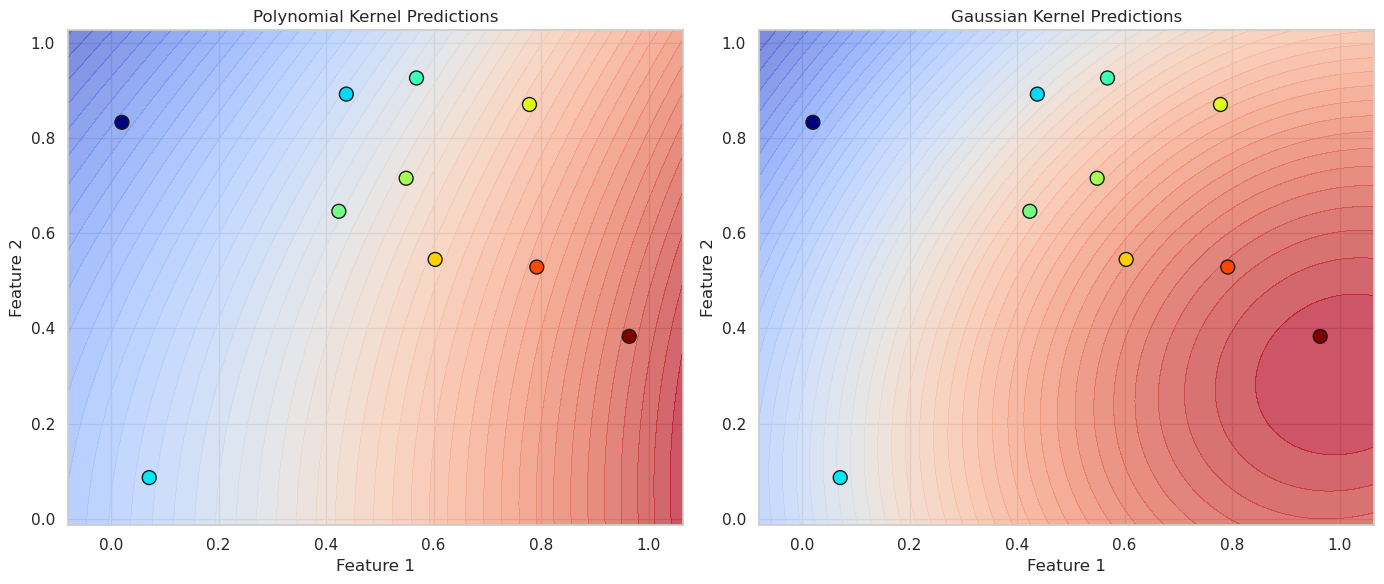

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Polynomial Kernel
def polynomial_kernel(x, z, degree=2, coef0=1):
    return (np.dot(x, z) + coef0) ** degree

# Gaussian (RBF) Kernel
def gaussian_kernel(x, z, sigma=1.0):
    return np.exp(-np.linalg.norm(x - z) ** 2 / (2 * sigma ** 2))

# Kernel Ridge Regression
def kernel_ridge_regression(X_train, t_train, kernel_function, lambda_):
    n_samples, n_features = X_train.shape
    
    # Compute the Kernel Matrix
    K = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        for j in range(n_samples):
            K[i, j] = kernel_function(X_train[i], X_train[j])
    
    # Add the regularization term (lambda * I)
    K_reg = K + lambda_ * np.eye(n_samples)
    
    # Solve for alpha: (K + lambda * I) * alpha = t_train
    alpha = np.linalg.solve(K_reg, t_train)
    
    return alpha, K

# Prediction Function using Kernel Ridge Regression
def predict(X_train, X_test, alpha, kernel_function):
    n_test = X_test.shape[0]
    n_train = X_train.shape[0]
    
    predictions = np.zeros(n_test)
    
    for i in range(n_test):
        k = np.zeros(n_train)
        for j in range(n_train):
            k[j] = kernel_function(X_test[i], X_train[j])
        predictions[i] = np.dot(alpha, k)
    
    return predictions

# Generate some sample data
np.random.seed(0)
X_train = np.random.rand(10, 2)  # 10 samples, 2 features
t_train = np.sin(X_train[:, 0]) + np.cos(X_train[:, 1])  # Target variable as a non-linear function of X

# Regularization parameter (lambda)
lambda_ = 0.1

# Train the Kernel Ridge Regression model using a Polynomial Kernel
alpha_poly, K_poly = kernel_ridge_regression(X_train, t_train, polynomial_kernel, lambda_)

# Train the Kernel Ridge Regression model using a Gaussian Kernel
alpha_gauss, K_gauss = kernel_ridge_regression(X_train, t_train, gaussian_kernel, lambda_)

# Test prediction on new data (same features but different input)
X_test = np.random.rand(5, 2)  # 5 new test samples

# Predict using Polynomial Kernel
predictions_poly = predict(X_train, X_test, alpha_poly, polynomial_kernel)

# Predict using Gaussian Kernel
predictions_gauss = predict(X_train, X_test, alpha_gauss, gaussian_kernel)

# Plotting

# Create a mesh grid to plot the decision surface (for 2D data)
x_min, x_max = X_train[:, 0].min() - 0.1, X_train[:, 0].max() + 0.1
y_min, y_max = X_train[:, 1].min() - 0.1, X_train[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Prepare the test points for predictions
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Predict on the grid points using both kernels
grid_predictions_poly = predict(X_train, grid_points, alpha_poly, polynomial_kernel)
grid_predictions_gauss = predict(X_train, grid_points, alpha_gauss, gaussian_kernel)

# Reshape the predictions back to the grid shape
grid_predictions_poly = grid_predictions_poly.reshape(xx.shape)
grid_predictions_gauss = grid_predictions_gauss.reshape(xx.shape)

# Plot training data and predictions

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Polynomial Kernel Plot
axs[0].contourf(xx, yy, grid_predictions_poly, levels=50, cmap='coolwarm', alpha=0.7)
axs[0].scatter(X_train[:, 0], X_train[:, 1], c=t_train, cmap='jet', edgecolors='k', marker='o', s=100)
axs[0].set_title('Polynomial Kernel Predictions')
axs[0].set_xlabel('Feature 1')
axs[0].set_ylabel('Feature 2')

# Gaussian Kernel Plot
axs[1].contourf(xx, yy, grid_predictions_gauss, levels=50, cmap='coolwarm', alpha=0.7)
axs[1].scatter(X_train[:, 0], X_train[:, 1], c=t_train, cmap='jet', edgecolors='k', marker='o', s=100)
axs[1].set_title('Gaussian Kernel Predictions')
axs[1].set_xlabel('Feature 1')
axs[1].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()


Alpha coefficients (Polynomial Kernel): [0.5270557919953978, 0.07950552871707078, 0.016308301797788805, 0.3415960965680671, 1.0691479280089355, -1.0861288850601072, -1.0604106373921263, -0.5976604718643836, -0.20998868322951286, 0.8657515997982013]
Alpha coefficients (Gaussian Kernel): [0.2610255403087205, 1.0151209295126444, 0.018175158247019152, 0.10098608347755939, 0.9921726716670138, -1.1630819923672104, -1.0574900403482628, -0.11127123760682658, -0.44797356735999216, 0.8080297581787308]


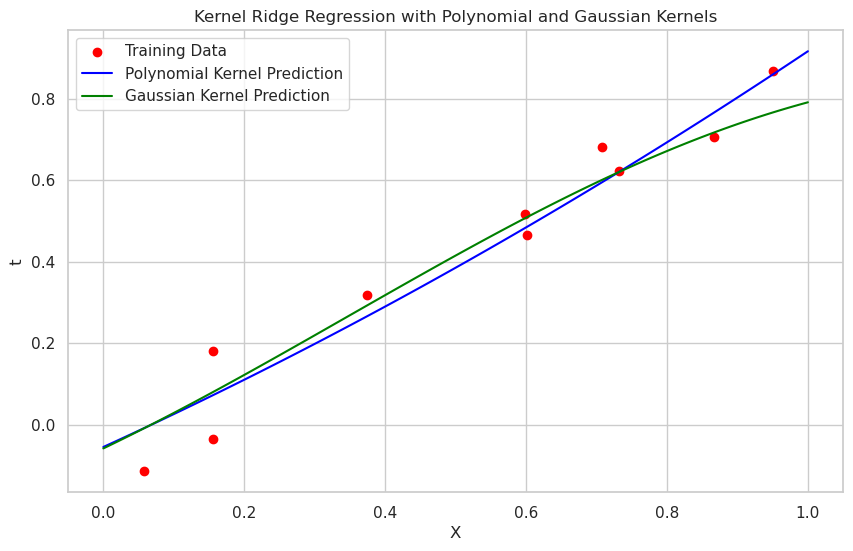

In [20]:
# Kernel Ridge Regression with Gaussian Elimination

# Polynomial Kernel
def polynomial_kernel(x, z, degree=2, coef0=1):
    return (x @ z.T + coef0) ** degree

# Gaussian Kernel
def gaussian_kernel(x, z, sigma=1.0):
    return np.exp(-np.linalg.norm(x - z) ** 2 / (2 * sigma ** 2))

# Gaussian Elimination
def gaussian_elimination(A, b):
    n = len(A)
    
    # Augment the matrix A with the vector b
    augmented_matrix = [row + [b[i]] for i, row in enumerate(A)]
    
    # Forward elimination
    for i in range(n):
        # Find pivot row
        max_row = max(range(i, n), key=lambda r: abs(augmented_matrix[r][i]))
        augmented_matrix[i], augmented_matrix[max_row] = augmented_matrix[max_row], augmented_matrix[i]
        
        # Normalize the pivot row
        pivot = augmented_matrix[i][i]
        for j in range(n + 1):  # Correct the loop range to n + 1
            augmented_matrix[i][j] /= pivot
        
        # Eliminate the entries below the pivot
        for j in range(i + 1, n):
            factor = augmented_matrix[j][i]
            for k in range(n + 1):  # Correct the loop range to n + 1
                augmented_matrix[j][k] -= factor * augmented_matrix[i][k]
    
    # Back substitution
    x = [0] * n
    for i in range(n - 1, -1, -1):
        x[i] = augmented_matrix[i][n]
        for j in range(i + 1, n):
            x[i] -= augmented_matrix[i][j] * x[j]
    
    return x

# Kernel Ridge Regression
def kernel_ridge_regression(X_train, t_train, kernel_function, lambda_):
    n = len(X_train)
    K = np.zeros((n, n))
    
    # Compute the Kernel Matrix
    for i in range(n):
        for j in range(n):
            K[i, j] = kernel_function(X_train[i], X_train[j])
    
    # Regularization: K + lambda * I
    K_reg = K + lambda_ * np.eye(n)
    
    # Solve for alpha: (K + lambda * I) * alpha = t_train
    alpha = gaussian_elimination(K_reg.tolist(), t_train.tolist())
    
    return alpha, K

# Generate some synthetic data (you can replace this with your actual dataset)
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X_train = np.random.rand(10, 1)  # 10 samples, 1 feature
t_train = np.sin(X_train).flatten() + 0.1 * np.random.randn(10)  # sine wave with noise

lambda_ = 0.1

# Train the Kernel Ridge Regression model using a Polynomial Kernel
alpha_poly, K_poly = kernel_ridge_regression(X_train, t_train, polynomial_kernel, lambda_)

# Train the Kernel Ridge Regression model using a Gaussian Kernel
alpha_gaussian, K_gaussian = kernel_ridge_regression(X_train, t_train, gaussian_kernel, lambda_)

# Print results
print("Alpha coefficients (Polynomial Kernel):", alpha_poly)
print("Alpha coefficients (Gaussian Kernel):", alpha_gaussian)

# Plotting the training data and kernel ridge regression results
X_test = np.linspace(0, 1, 100).reshape(-1, 1)

# Predict using the Polynomial Kernel
K_test_poly = np.array([polynomial_kernel(X_test[i], X_train[j]) for i in range(len(X_test)) for j in range(len(X_train))]).reshape(len(X_test), len(X_train))
y_poly = K_test_poly @ alpha_poly

# Predict using the Gaussian Kernel
K_test_gaussian = np.array([gaussian_kernel(X_test[i], X_train[j]) for i in range(len(X_test)) for j in range(len(X_train))]).reshape(len(X_test), len(X_train))
y_gaussian = K_test_gaussian @ alpha_gaussian

# Plotting the training points and predictions
plt.figure(figsize=(10, 6))

# Training data points
plt.scatter(X_train, t_train, color='red', label='Training Data')

# Polynomial kernel prediction
plt.plot(X_test, y_poly, label='Polynomial Kernel Prediction', color='blue')

# Gaussian kernel prediction
plt.plot(X_test, y_gaussian, label='Gaussian Kernel Prediction', color='green')

plt.title('Kernel Ridge Regression with Polynomial and Gaussian Kernels')
plt.xlabel('X')
plt.ylabel('t')
plt.legend()
plt.grid(True)
plt.show()


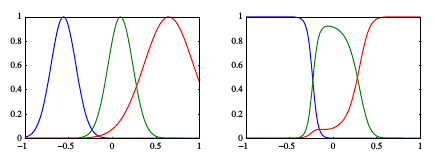

Fig.2 Plot of a set of Gaussian basis functions on the left, together with the corresponding normalized basis functions on the right.

## Radial Basis Function Networks for Regression

### Introduction to Radial Basis Functions (RBF)
Radial Basis Functions (RBFs) are a class of functions that depend only on the radial distance from a center. Typically, they are defined as:

$$ \phi_j(x) = h(\|x - \mu_j\|) $$

Where:
- $ \mu_j $ is the center of the $ j $-th basis function.

RBFs are commonly used for exact function interpolation. Given a set of input vectors $ \{ x_1, x_2, \dots, x_N \} $ and corresponding target values $ \{ t_1, t_2, \dots, t_N \} $, the goal is to find a smooth function $ f(x) $ that fits each target value exactly, i.e., $ f(x_n) = t_n $.

### Exact Function Interpolation
The function $ f(x) $ can be expressed as a linear combination of radial basis functions:

$$
f(x) = \sum_{n=1}^N w_n h(\|x - x_n\|)
$$

Where:
- $ \{x_1, x_2, \dots, x_N\} $ are the input data points.
- $ \{t_1, t_2, \dots, t_N\} $ are the target values.
- $ w_n $ are the coefficients, which are determined by least squares.

### Noise and Regularization in Regression
In real-world scenarios, the target values are noisy, and exact interpolation is undesirable as it leads to overfitting. To address this, regularization is introduced. The objective function becomes:

$$
\text{Minimize } \sum_{n=1}^N \left\| y(x_n + \xi) - t_n \right\|^2 \nu(\xi) d\xi
$$

Where:
- $ \xi $ represents the noise on the input variable $ x $.
- $ \nu(\xi) $ is the distribution of the noise.

The result of this optimization gives a smooth function $ y(x) $:

$$
y(x_n) = \sum_{n=1}^N t_n h(x - x_n)
$$

The basis functions are normalized as:

$$
h(x - x_n) = \frac{\nu(x - x_n)}{\sum_{n=1}^N \nu(x - x_n)}
$$

This approach is known as the **Nadaraya-Watson model**.

### Reducing Computational Cost
While having one basis function for every data point $ x_n $ is computationally expensive, there are methods to reduce the number of basis functions:

1. **Subset of Data Points**: Choose a random subset of data points as the centers of the basis functions.
2. **Orthogonal Least Squares (OLS)**: A sequential selection process where the next data point chosen as a center is the one that minimizes the sum-of-squares error.
3. **Clustering**: Clustering algorithms, such as **K-means**, can be used to select basis function centers that may not coincide with the training data points.

### Plot of Basis Functions
You can visualize the Gaussian basis functions and their normalized counterparts as follows:



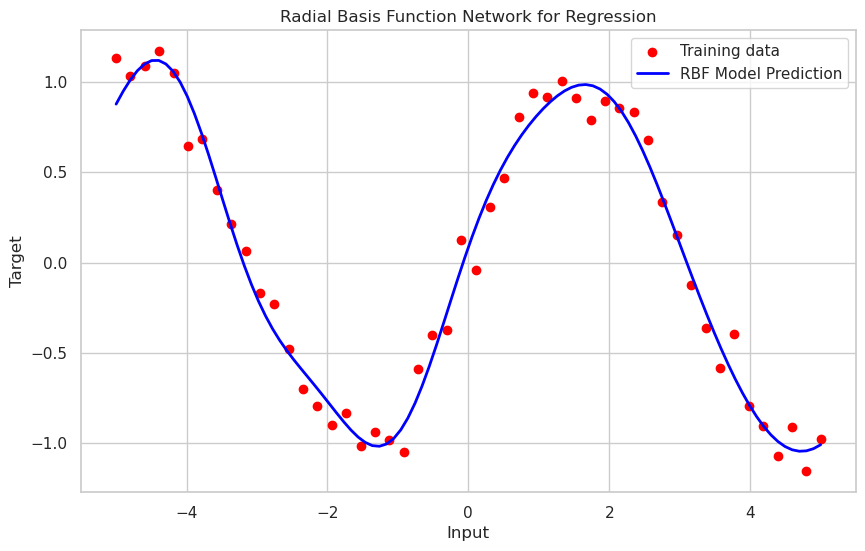

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import lstsq

# Step 1: Generate synthetic data (1D)
np.random.seed(0)
X_train = np.linspace(-5, 5, 50).reshape(-1, 1)  # 50 points in 1D
t_train = np.sin(X_train) + 0.1 * np.random.randn(50, 1)  # sine function with noise

# Step 2: Define Radial Basis Function (RBF) - Gaussian Kernel
def rbf(x, c, sigma=1.0):
    """ Radial Basis Function - Gaussian Kernel """
    return np.exp(-np.linalg.norm(x - c)**2 / (2 * sigma**2))

# Step 3: Construct the RBF design matrix
def construct_rbf_matrix(X, centers, sigma=1.0):
    """ Construct the RBF matrix """
    N = X.shape[0]  # Number of data points
    M = centers.shape[0]  # Number of centers
    Phi = np.zeros((N, M))  # Initialize the design matrix
    for i in range(N):
        for j in range(M):
            Phi[i, j] = rbf(X[i], centers[j], sigma)
    return Phi

# Step 4: Solve for the weights using least squares
def rbf_regression(X, t, centers, sigma=1.0):
    """ RBF Regression using Least Squares """
    Phi = construct_rbf_matrix(X, centers, sigma)
    # Solve the linear system Phi * w = t
    w, _, _, _ = lstsq(Phi, t)
    return w

# Step 5: Make predictions
def predict(X, centers, w, sigma=1.0):
    """ Predict using the RBF model """
    Phi = construct_rbf_matrix(X, centers, sigma)
    return np.dot(Phi, w)

# Step 6: Visualization
# Select centers for RBFs (we'll use a random subset of data points)
centers = X_train[np.random.choice(X_train.shape[0], 10, replace=False)].reshape(-1, 1)

# Train the RBF model
w = rbf_regression(X_train, t_train, centers, sigma=1.0)

# Make predictions
X_test = np.linspace(-5, 5, 100).reshape(-1, 1)
t_pred = predict(X_test, centers, w, sigma=1.0)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X_train, t_train, color='red', label='Training data')
plt.plot(X_test, t_pred, label='RBF Model Prediction', color='blue', linewidth=2)
plt.xlabel('Input')
plt.ylabel('Target')
plt.title('Radial Basis Function Network for Regression')
plt.legend()
plt.grid(True)
plt.show()


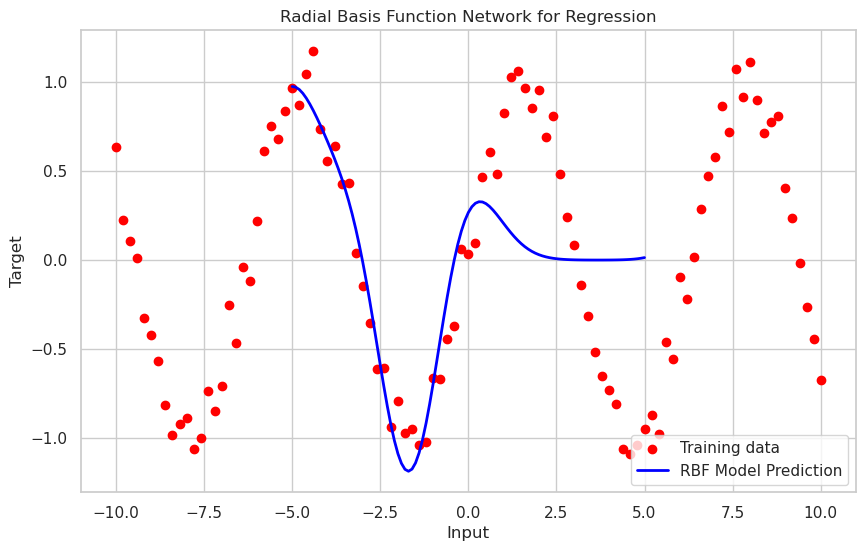

In [24]:
import random
import math
import matplotlib.pyplot as plt
from scipy.linalg import lstsq

# Step 1: Generate synthetic data (1D)
random.seed(0)

def generate_data():
    X_train = [i * 0.2 for i in range(-50, 51)]  # 50 points in 1D
    t_train = [math.sin(x) + 0.1 * random.gauss(0, 1) for x in X_train]  # sine function with noise
    return X_train, t_train

X_train, t_train = generate_data()

# Step 2: Define Radial Basis Function (RBF) - Gaussian Kernel
def rbf(x, c, sigma=1.0):
    """ Radial Basis Function - Gaussian Kernel """
    return math.exp(-((x - c) ** 2) / (2 * sigma ** 2))

# Step 3: Construct the RBF design matrix
def construct_rbf_matrix(X, centers, sigma=1.0):
    """ Construct the RBF matrix """
    N = len(X)  # Number of data points
    M = len(centers)  # Number of centers
    Phi = [[0] * M for _ in range(N)]  # Initialize the design matrix
    for i in range(N):
        for j in range(M):
            Phi[i][j] = rbf(X[i], centers[j], sigma)
    return Phi

# Step 4: Solve for the weights using least squares
def rbf_regression(X, t, centers, sigma=1.0):
    """ RBF Regression using Least Squares """
    Phi = construct_rbf_matrix(X, centers, sigma)

    # Solve the linear system Phi * w = t using scipy's lstsq
    w, _, _, _ = lstsq(Phi, t)
    return w

# Step 5: Make predictions
def predict(X, centers, w, sigma=1.0):
    """ Predict using the RBF model """
    Phi = construct_rbf_matrix(X, centers, sigma)
    return [sum(Phi[i][j] * w[j] for j in range(len(w))) for i in range(len(X))]

# Step 6: Visualization
# Select centers for RBFs (we'll use a random subset of data points)
centers = random.sample(X_train, 10)

# Train the RBF model
w = rbf_regression(X_train, t_train, centers, sigma=1.0)

# Make predictions
X_test = [i * 0.1 for i in range(-50, 51)]  # Test points
t_pred = predict(X_test, centers, w, sigma=1.0)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X_train, t_train, color='red', label='Training data')
plt.plot(X_test, t_pred, label='RBF Model Prediction', color='blue', linewidth=2)
plt.xlabel('Input')
plt.ylabel('Target')
plt.title('Radial Basis Function Network for Regression')
plt.legend()
plt.grid(True)
plt.show()


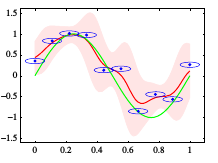

Fig.3 Illustration of the Nadaraya-Watson kernel regression model using isotropic Gaussian kernels, for the sinusoidal data set. The original sine function is shown by the green curve, the data points are shown in blue, and each is the centre of an isotropic Gaussian kernel. The resulting regression function, given by the condi- tional mean, is shown by the red line, along with the two- standard-deviation region for the conditional distribution p(t|x) shown by the red shading. The blue ellipse around each data point shows one standard deviation contour for the corresponding kernel. These appear noncircular due to the different scales on the horizontal and vertical axes.

## Nadaraya-Watson Model

We saw that the prediction of a linear regression model for a new input $ x $ takes the form of a linear combination of the training set target values with coefficients given by the ‘equivalent kernel’:

$$
y(x) = \sum_{n=1}^{N} k(x, x_n) t_n
$$

where the equivalent kernel satisfies the summation constraint:

$$
\sum_{n=1}^{N} k(x, x_n) = 1
$$

We can motivate the kernel regression model from a different perspective, starting with **kernel density estimation**. Suppose we have a training set $ \{x_n, t_n\} $ and we use a Parzen density estimator to model the joint distribution $ p(x, t) $, so that:

$$
p(x, t) = \frac{1}{N} \sum_{n=1}^{N} f(x - x_n, t - t_n)
$$

where $ f(x, t) $ is the component density function, and there is one such component centered on each data point.

Next, we find an expression for the regression function $ y(x) $, corresponding to the conditional average of the target variable conditioned on the input variable. This is given by:

$$
y(x) = E[t|x] = \int_{-\infty}^{\infty} t p(t|x) \, dt = \int_{-\infty}^{\infty} p(x, t) \, dt
$$

Substituting the expression for \( p(x, t) \), we get:

$$
y(x) = \sum_{n=1}^{N} \frac{g(x - x_n)}{\sum_{m=1}^{N} g(x - x_m)} t_n
$$

where the kernel function \( k(x, x_n) \) is given by:

$$
k(x, x_n) = \frac{g(x - x_n)}{\sum_{m=1}^{N} g(x - x_m)}
$$

and \( g(x) \) is defined as:

$$
g(x) = \int_{-\infty}^{\infty} f(x, t) \, dt
$$

The result above is known as the **Nadaraya-Watson model**, or kernel regression. For a localized kernel function, it has the property of giving more weight to the data points $ x_n $ that are close to $ x $.

Note that the kernel $ k(x, x_n) $ satisfies the summation constraint:

$$
\sum_{n=1}^{N} k(x, x_n) = 1
$$

### Conditional Expectation and Distribution

This model defines not only a conditional expectation but also a full conditional distribution. The conditional distribution $ p(t|x) $ is given by:

$$
p(t|x) = \frac{\sum_{n=1}^{N} f(x - x_n, t - t_n)}{\sum_{m=1}^{N} \int_{-\infty}^{\infty} f(x - x_m, t - t_m) \, dt}
$$

For a single input variable $ x $, where $ f(x, t) $ is a zero-mean isotropic Gaussian over the variable $ z = (x, t) $ with variance $ \sigma^2 $, the corresponding conditional distribution is a **Gaussian mixture**. This is illustrated in the figure below, showing the conditional mean along with the two-standard-deviation region for the conditional distribution.

### Extensions

An obvious extension of this model is to allow for more flexible forms of Gaussian components, such as having different variance parameters for the input and target variables. More generally, we could model the joint distribution $ p(t, x) $ using a **Gaussian mixture model**. This can be trained using techniques discussed in (Ghahramani and Jordan, 1994), and we can then find the corresponding conditional distribution $ p(t|x) $.

In this case, we no longer have a representation in terms of kernel functions evaluated at the training set data points. However, the number of components in the mixture model can be smaller than the number of training set points, resulting in a model that is faster to evaluate for test data points. This trade-off involves accepting increased computational cost during the training phase to have a model that is faster at making predictions.

---

### Visualization

The figure below illustrates the Nadaraya-Watson kernel regression model using isotropic Gaussian kernels for the sinusoidal data set. The **green curve** shows the original sine function, the **blue points** represent the data points, and each data point is the center of an isotropic Gaussian kernel. The **red line** shows the resulting regression function, which represents the conditional mean, along with the **red shading** showing the two-standard-deviation region for the conditional distribution $ p(t|x) $.


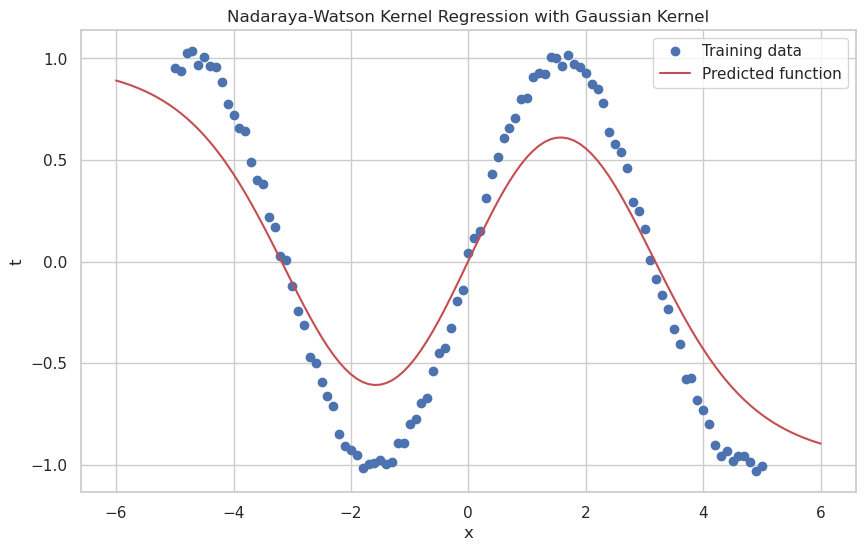

In [25]:
import math
import matplotlib.pyplot as plt

# Gaussian Kernel Function
def gaussian_kernel(x, center, sigma):
    """ Gaussian kernel function """
    return math.exp(- (distance(x, center) ** 2) / (2 * sigma ** 2))

# Euclidean Distance Function
def distance(x, center):
    """ Compute Euclidean distance between two points """
    return math.sqrt(sum((x_i - center_i) ** 2 for x_i, center_i in zip(x, center)))

# Nadaraya-Watson Kernel Regression
def nadaraya_watson(X_train, t_train, x_test, sigma=1.0):
    """
    Nadaraya-Watson kernel regression model using Gaussian kernels.
    
    X_train: List of training inputs (list of lists)
    t_train: List of target values corresponding to X_train
    x_test: List of test inputs to predict
    sigma: Bandwidth of the Gaussian kernel
    """
    N = len(X_train)
    predictions = []

    for x in x_test:
        numerator = 0
        denominator = 0
        for i in range(N):
            k = gaussian_kernel(x, X_train[i], sigma)
            numerator += k * t_train[i]
            denominator += k
        # Predicted value for this test point
        predictions.append(numerator / denominator if denominator != 0 else 0)
    
    return predictions

# Example Usage
# Define training data (X_train, t_train) - Sinusoidal function with some noise
X_train = [[i / 10] for i in range(-50, 51)]  # X values from -5 to 5
t_train = [math.sin(x[0]) + 0.1 * (random.random() - 0.5) for x in X_train]  # t = sin(x) with noise

# Define test data (X_test) - Points for which we will predict the target values
X_test = [[i / 10] for i in range(-60, 61)]  # X values from -6 to 6

# Perform Nadaraya-Watson Kernel Regression
sigma = 1.0  # Choose a sigma value for the Gaussian kernel
predictions = nadaraya_watson(X_train, t_train, X_test, sigma)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot([x[0] for x in X_train], t_train, 'bo', label='Training data')
plt.plot([x[0] for x in X_test], predictions, 'r-', label='Predicted function')
plt.xlabel('x')
plt.ylabel('t')
plt.title('Nadaraya-Watson Kernel Regression with Gaussian Kernel')
plt.legend()
plt.show()
